Here in this project, we will try to find out how to save more resources of the firm by prioritizing
whom to contact first among all those people who are predicted as favourable case scenario.

In [1]:
# Importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the dataset and checking its attributes

df=pd.read_excel('bank_telemaketing.xlsx')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.shape

(41188, 21)

In [5]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [6]:
# Setting Display options to ensure feature name visibility

pd.set_option('display.max_columns',None)

In [7]:
# Label the Target feature to 1/0

df['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [8]:
df['target']=np.where(df['y']=="yes",1,0)

In [9]:
# Drop the Target feature to retain only Target

df=df.drop(['y'],axis=1)

In [10]:
# Defining Target and Independent Features

Y=df[['target']]

X=df.drop(['target'],axis=1)

In [11]:
# Get the Event Rate

Y.mean()

target    0.112654
dtype: float64

In [85]:
# Split features into Numerical and Categorical

char=X.loc[:,X.dtypes==np.object]
num=X.loc[:,X.dtypes!=np.object]

In [86]:
# Check the data types

print(num.dtypes)
print(char.dtypes)

age                 int64
duration            int64
campaign            int64
pdays               int64
previous            int64
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
dtype: object
job            object
marital        object
education      object
default        object
housing        object
loan           object
contact        object
month          object
day_of_week    object
poutcome       object
dtype: object


In [15]:
# Let's find the unique values in numerical columns

def unique_levels(x):
    x=x.value_counts().count()
    return(x)
df_value_counts=pd.DataFrame(num.apply(lambda x : unique_levels(x)))
df_value_counts

,0
age,78
duration,1544
campaign,42
pdays,27
previous,8
emp.var.rate,10
cons.price.idx,26
cons.conf.idx,26
euribor3m,316
nr.employed,11


In [16]:
df_value_counts.columns=['feature_levels']
df_value_counts

,feature_levels
age,78
duration,1544
campaign,42
pdays,27
previous,8
emp.var.rate,10
cons.price.idx,26
cons.conf.idx,26
euribor3m,316
nr.employed,11


In [17]:
#  With columns less that 20 unique values, we can take them as categorical.
# So let's slice them away

slice1=df_value_counts.loc[df_value_counts['feature_levels']<=20]
cat_list=slice1.index
cat=num.loc[:,cat_list]
cat.dtypes

previous          int64
emp.var.rate    float64
nr.employed     float64
dtype: object

In [18]:
slice2=df_value_counts.loc[df_value_counts['feature_levels']>20]
num_list=slice2.index
num=num.loc[:,num_list]

In [19]:
# Concatenate these low unique value count columns to categorical columns and check how both datasets look now

char=pd.concat([char,cat],axis=1,join="inner")

In [20]:
char.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,previous,emp.var.rate,nr.employed
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,0,1.1,5191.0
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,0,1.1,5191.0
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,0,1.1,5191.0
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,0,1.1,5191.0
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,0,1.1,5191.0


In [21]:
num.head()

,age,duration,campaign,pdays,cons.price.idx,cons.conf.idx,euribor3m
0,56,261,1,999,93.994,-36.4,4.857
1,57,149,1,999,93.994,-36.4,4.857
2,37,226,1,999,93.994,-36.4,4.857
3,40,151,1,999,93.994,-36.4,4.857
4,56,307,1,999,93.994,-36.4,4.857


# Outlier Analysis of Numerical Features

In [22]:
# Let's use describe function to show us the percentiles starting 1% to 99%

num.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.9,0.99])

,age,duration,campaign,pdays,cons.price.idx,cons.conf.idx,euribor3m
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,93.575664,-40.502600,3.621291
std,10.42125,259.279249,2.770014,186.910907,0.578840,4.628198,1.734447
min,17.00000,0.000000,1.000000,0.000000,92.201000,-50.800000,0.634000
1%,23.00000,11.000000,1.000000,3.000000,92.201000,-49.500000,0.658480
5%,26.00000,36.000000,1.000000,999.000000,92.713000,-47.100000,0.797000
10%,28.00000,59.000000,1.000000,999.000000,92.893000,-46.200000,1.046000
25%,32.00000,102.000000,1.000000,999.000000,93.075000,-42.700000,1.344000
50%,38.00000,180.000000,2.000000,999.000000,93.749000,-41.800000,4.857000
75%,47.00000,319.000000,3.000000,999.000000,93.994000,-36.400000,4.961000


# Capping and Flooring of outliers

In [23]:
# Removing etreme outliers

def outlier_cap(x):
    x=x.clip(lower=x.quantile(0.01))
    x=x.clip(upper=x.quantile(0.99))
    return(x)

In [24]:
num=num.apply(lambda x : outlier_cap(x))

In [25]:
# Check again

num.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.9,0.99])

,age,duration,campaign,pdays,cons.price.idx,cons.conf.idx,euribor3m
count,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,39.976644,254.379784,2.500024,962.479290,93.574052,-40.495137,3.621394
std,10.138262,235.184174,2.301191,186.891194,0.576030,4.612905,1.734194
min,23.000000,11.000000,1.000000,3.000000,92.201000,-49.500000,0.658480
1%,23.000000,11.000000,1.000000,3.000000,92.201000,-49.500000,0.658932
5%,26.000000,36.000000,1.000000,999.000000,92.713000,-47.100000,0.797000
10%,28.000000,59.000000,1.000000,999.000000,92.893000,-46.200000,1.046000
25%,32.000000,102.000000,1.000000,999.000000,93.075000,-42.700000,1.344000
50%,38.000000,180.000000,2.000000,999.000000,93.749000,-41.800000,4.857000
75%,47.000000,319.000000,3.000000,999.000000,93.994000,-36.400000,4.961000


# Missing Value Analysis

In [26]:
num.isnull().mean()

age               0.0
duration          0.0
campaign          0.0
pdays             0.0
cons.price.idx    0.0
cons.conf.idx     0.0
euribor3m         0.0
dtype: float64

In [27]:
char.isnull().mean()

job             0.0
marital         0.0
education       0.0
default         0.0
housing         0.0
loan            0.0
contact         0.0
month           0.0
day_of_week     0.0
poutcome        0.0
previous        0.0
emp.var.rate    0.0
nr.employed     0.0
dtype: float64

In [28]:
# Since the data does not contain any missing values Imputation Processes are not required
# In case there are missing values in the data, then please remove those columns or features that have more than 25% of rows as missing
# X = X.loc[:, X.isnull().mean() <= .25]

# Feature Selection - Numerical Features

# Part 1 : Remove Features with 0 Variance

In [29]:
from sklearn.feature_selection import VarianceThreshold

varselector= VarianceThreshold(threshold=0)
varselector.fit_transform(num)
# Get columns to keep and create new dataframe with those only
cols = varselector.get_support(indices=True)
num_1 = num.iloc[:,cols]

In [30]:
num_1.iloc[0]

age                56.000
duration          261.000
campaign            1.000
pdays             999.000
cons.price.idx     93.994
cons.conf.idx     -36.400
euribor3m           4.857
Name: 0, dtype: float64

# Part 2 - Bi Variate Analysis (Feature Discretization)

In [31]:
from sklearn.preprocessing import KBinsDiscretizer
discrete=KBinsDiscretizer(n_bins=10,encode='ordinal', strategy='quantile')
num_binned=pd.DataFrame(discrete.fit_transform(num_1),index=num_1.index, columns=num_1.columns).add_suffix('_Rank')
num_binned.head()

,age_Rank,duration_Rank,campaign_Rank,pdays_Rank,cons.price.idx_Rank,cons.conf.idx_Rank,euribor3m_Rank
0,9.0,6.0,0.0,0.0,6.0,6.0,5.0
1,9.0,4.0,0.0,0.0,6.0,6.0,5.0
2,4.0,6.0,0.0,0.0,6.0,6.0,5.0
3,5.0,4.0,0.0,0.0,6.0,6.0,5.0
4,9.0,7.0,0.0,0.0,6.0,6.0,5.0


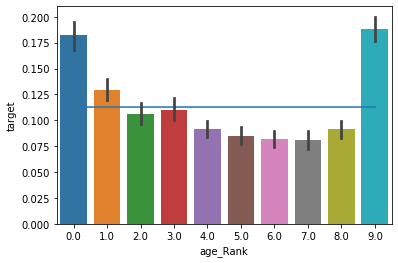

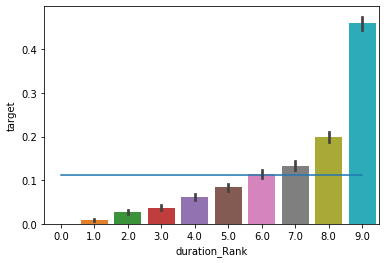

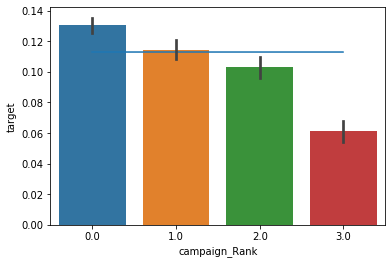

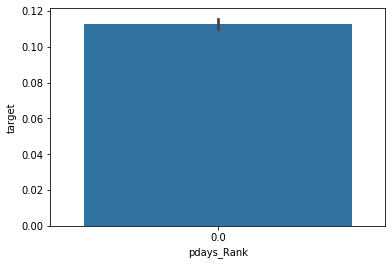

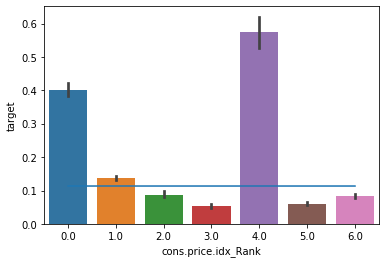

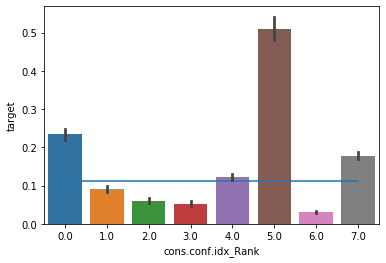

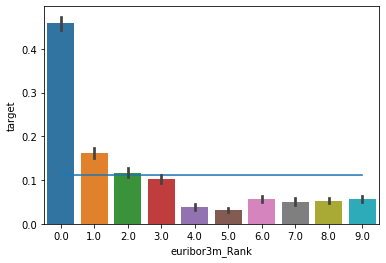

In [33]:
#Check if the features show a slope at all
#If they do, then do you see some deciles below the population average and some higher than population average?
#If that is the case then the slope will be strong
#Conclusion: A strong slope is indicative of the features' ability to discriminate the event from non event
#            making it a good predictor


X_bin_combined=pd.concat([Y,num_binned],axis=1,join='inner')

from numpy import mean
for col in (num_binned.columns):
    plt.figure()
    sns.lineplot(x=col,y=X_bin_combined['target'].mean(),data=X_bin_combined)
    sns.barplot(x=col, y="target",data=X_bin_combined, estimator=mean )
plt.show()

In [32]:
#df['pdays_rank']=pd.qcut(df['pdays'].rank(method='first').values,5,duplicates='drop').codes+1
#from numpy import mean
#ax = sns.barplot(x="pdays_rank", y="target", data=df, estimator=mean)

In [33]:
# Now, we will drop 'age' and 'pdays' columns as they do not seem to be making good predictors

num_1=num_1.drop(['age','pdays'],axis=1)

In [34]:
# All features from num_1 will get selected due to good discrimination power by all of them
select_features_df_num=num_1

In [35]:
select_features_df_num.shape

(41188, 5)

# Feature Selection - Categorical Features

# Part 1 - Bi Variate Analysis

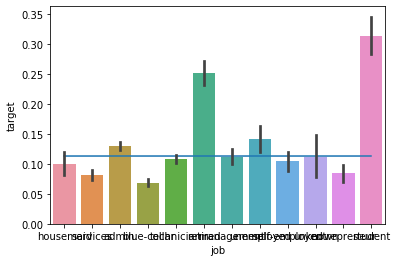

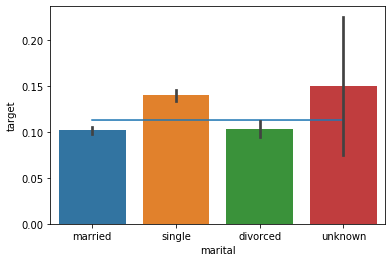

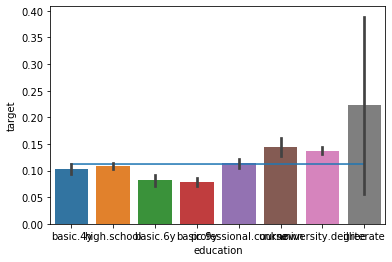

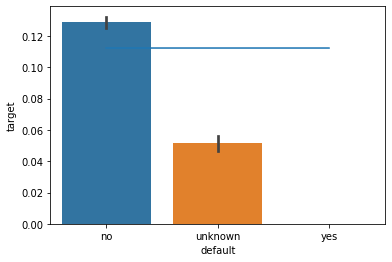

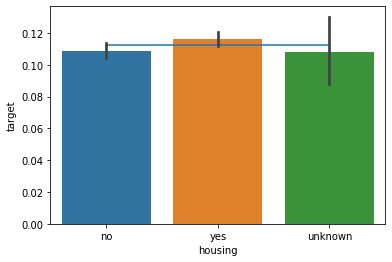

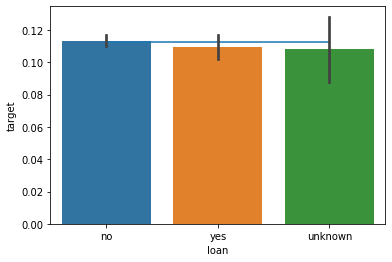

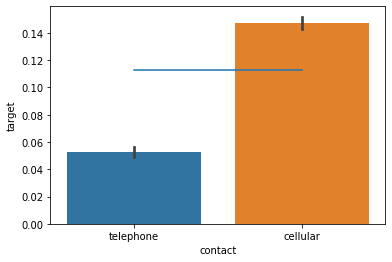

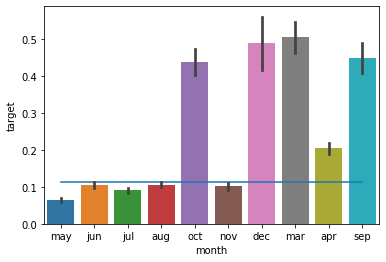

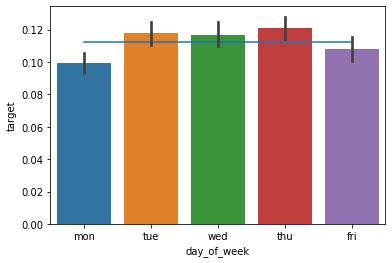

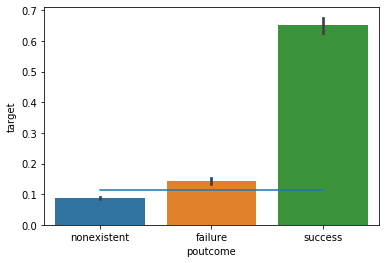

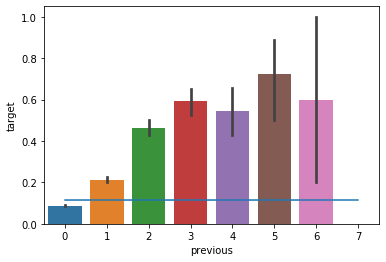

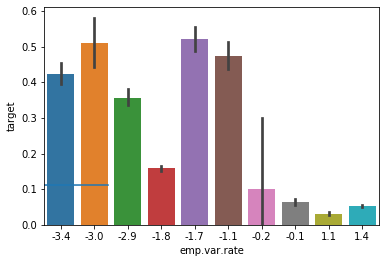

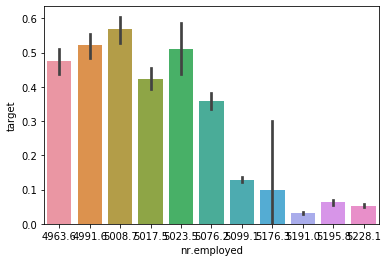

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
X_char_merged=pd.concat([Y,char],axis=1,join='inner')

from numpy import mean
for col in (char.columns):
    plt.figure()
    sns.lineplot(x=col,y=X_char_merged['target'].mean(),data=X_char_merged)
    sns.barplot(x=col, y="target",data=X_char_merged, estimator=mean )
plt.show()

In [36]:
# Now, we will drop 'housing','education','marital','loan' and 'day_of_week' columns as they do not seem to be making good predictors

char=char.drop(['housing','education','marital','loan','day_of_week'],axis=1)

In [37]:
char['default']=np.where(char['default'] =='unknown', 'yes', char['default'])
#char['previous_ind']=np.where(char['previous'] >0, 1, 0) (try  this option to see the impact on the model)
#char=char.drop(['previous'],drop=1)

In [38]:
char['emp.var.rate']=char['emp.var.rate'].astype('object')

In [39]:
emp_var_df=char[['emp.var.rate']]

In [40]:
# Create dummy features with n-1 levels
X_char_dum = pd.get_dummies(char, drop_first = True)
X_char_dum.shape

(41188, 35)

# Part 2 - Select K Best

In [41]:
# Select K Best for Categorical Features
from sklearn.feature_selection import SelectKBest, chi2 
selector = SelectKBest(chi2, k=30) 
selector.fit_transform(X_char_dum, Y)
# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True) 
select_features_df_char = X_char_dum.iloc[:,cols]

In [42]:
select_features_df_char=X_char_dum

# Creating the Master Feature Set for Model Development

In [43]:
X_all=pd.concat([select_features_df_char,select_features_df_num],axis=1,join="inner")

In [44]:
X_all.shape

(41188, 40)

# Train Test Split

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_all, Y, test_size=0.3, random_state=10)

In [46]:
print("Shape of Training Data",X_train.shape)
print("Shape of Testing Data",X_test.shape)
print("Response Rate in Training Data",y_train.mean())
print("Response Rate in Testing Data",y_test.mean())

Shape of Training Data (28831, 40)
Shape of Testing Data (12357, 40)
Response Rate in Training Data target    0.111616
dtype: float64
Response Rate in Testing Data target    0.115076
dtype: float64


# Model Building Step

In [47]:
# Building a Logistic Regression Model

from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(random_state=0)
logreg.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [48]:
coeff_df=pd.DataFrame(X_all.columns)
coeff_df.columns=['features']
coeff_df["Coefficient Estimate"] = pd.Series(logreg.coef_[0])
coeff_df

,features,Coefficient Estimate
0,previous,0.161151
1,nr.employed,-0.007039
2,job_blue-collar,-0.268085
3,job_entrepreneur,-0.004719
4,job_housemaid,0.003753
5,job_management,-0.020291
6,job_retired,0.117189
7,job_self-employed,-0.012114
8,job_services,-0.122689
9,job_student,0.059796


In [49]:
# Building a Decision Tree Model

from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(criterion='gini',random_state=0)

In [50]:
dtree=DecisionTreeClassifier(criterion='gini',random_state=0,max_depth=6,min_samples_split=500)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_split=500, random_state=0)

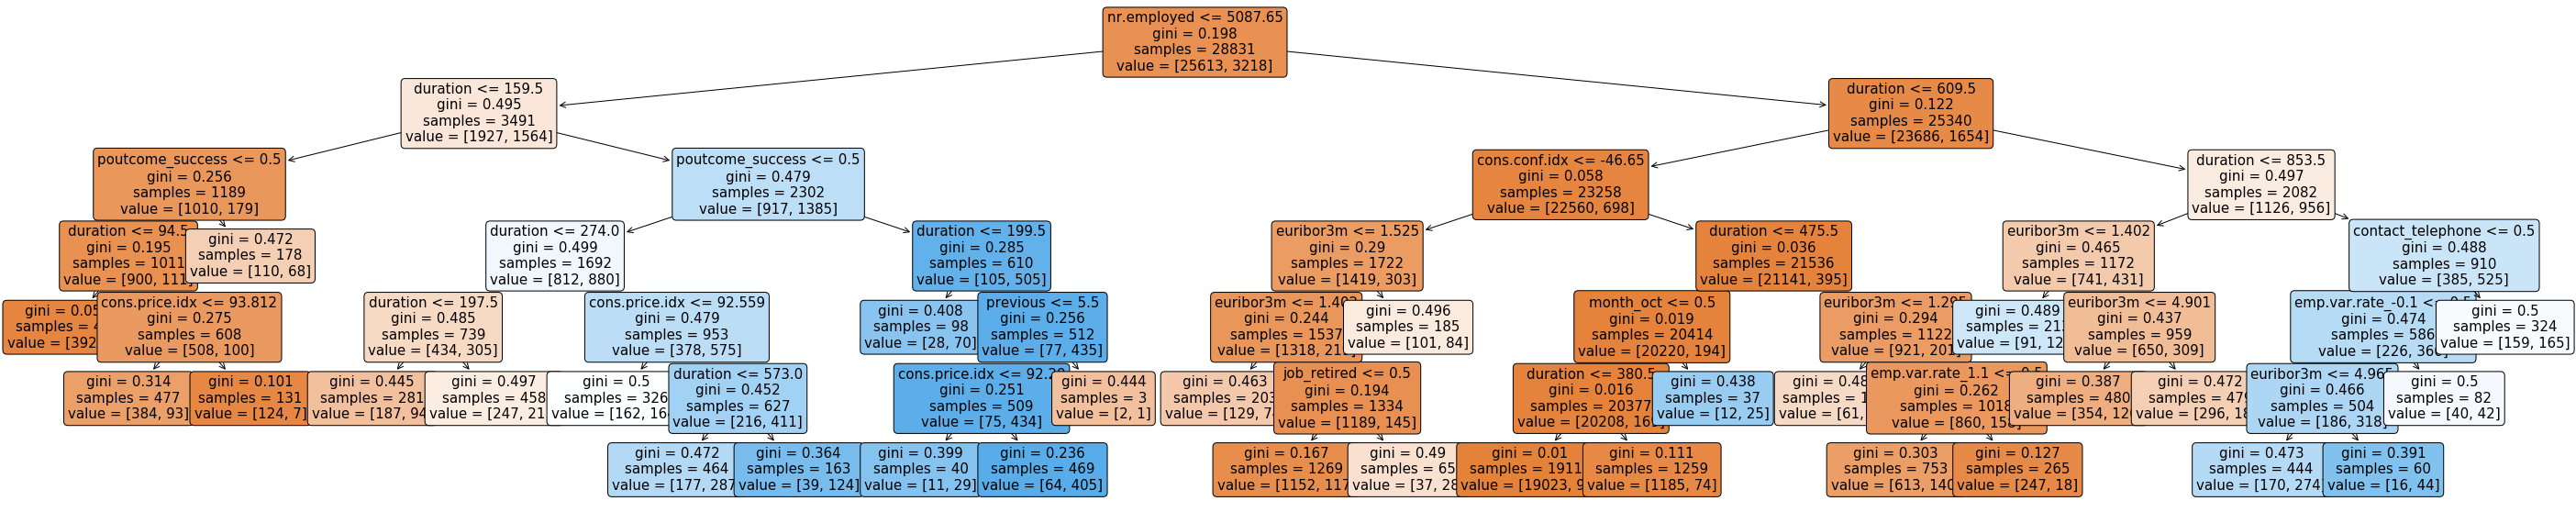

In [64]:
from sklearn import tree
import pydotplus
import matplotlib.pyplot as plt
plt.figure(figsize=[50,10])
tree.plot_tree(dtree,filled=True,fontsize=15,rounded=True,feature_names=X_all.columns)
plt.show()

In [51]:
# Building a Random Forest Model

from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(criterion='gini',random_state=0,max_depth=6,min_samples_split=500)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=6, min_samples_split=500, random_state=0)

In [52]:
import pandas as pd
feature_importances=pd.DataFrame(rf.feature_importances_,
                                 index=X_train.columns,
                                 columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
duration,0.314326
nr.employed,0.170511
euribor3m,0.166057
poutcome_success,0.101821
cons.conf.idx,0.059745
cons.price.idx,0.050966
emp.var.rate_-1.7,0.023186
previous,0.019782
poutcome_nonexistent,0.014513
emp.var.rate_-2.9,0.013420


In [53]:
# Building a Gradient Boosting Model

from sklearn.ensemble import GradientBoostingClassifier
gbm=GradientBoostingClassifier(criterion='mse',random_state=0,max_depth=6,min_samples_split=500)
gbm.fit(X_train,y_train)

GradientBoostingClassifier(criterion='mse', max_depth=6, min_samples_split=500,
                           random_state=0)

In [54]:
import pandas as pd
feature_importances=pd.DataFrame(gbm.feature_importances_,
                                 index=X_train.columns,
                                 columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
duration,0.459231
nr.employed,0.307582
euribor3m,0.079692
poutcome_success,0.044301
cons.conf.idx,0.032564
month_oct,0.014085
campaign,0.008835
cons.price.idx,0.007249
month_mar,0.007201
contact_telephone,0.005988


# Model Evaluation

In [55]:
y_pred_logreg=logreg.predict(X_test)
y_pred_tree=dtree.predict(X_test)
y_pred_rf=rf.predict(X_test)
y_pred_gbm=gbm.predict(X_test)
#y_pred_stacking=clf.predict(X_test)

In [56]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [57]:
# Logistic Regression

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_logreg))
print("Precision",metrics.precision_score(y_test,y_pred_logreg))
print("Recall",metrics.recall_score(y_test,y_pred_logreg))
print("f1_score",metrics.f1_score(y_test,y_pred_logreg))

Accuracy: 0.9055596018451081
Precision 0.6443941109852774
Recall 0.40014064697609003
f1_score 0.493709327548807


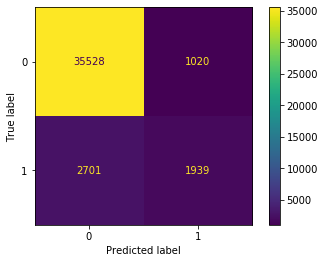

In [81]:
metrics.plot_confusion_matrix(logreg,X_all,Y)

In [58]:
# Decision Tree

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_tree))
print("Precision",metrics.precision_score(y_test,y_pred_tree))
print("Recall",metrics.recall_score(y_test,y_pred_tree))
print("f1_score",metrics.f1_score(y_test,y_pred_tree))

Accuracy: 0.9121955167111758
Precision 0.6463944396177237
Recall 0.5232067510548524
f1_score 0.5783132530120483


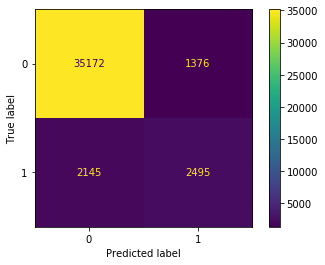

In [82]:
metrics.plot_confusion_matrix(dtree,X_all,Y)

In [59]:
# Random Forest

from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rf))
print("Precision",metrics.precision_score(y_test,y_pred_rf))
print("Recall",metrics.recall_score(y_test,y_pred_rf))
print("f1_score",metrics.f1_score(y_test,y_pred_rf))

Accuracy: 0.9017560896657765
Precision 0.7587064676616916
Recall 0.21448663853727146
f1_score 0.3344298245614035


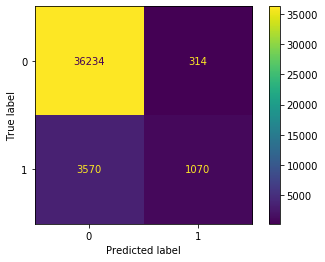

In [83]:
metrics.plot_confusion_matrix(rf,X_all,Y)

In [60]:
# Gradient Boost

from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_gbm))
print("Precision",metrics.precision_score(y_test,y_pred_gbm))
print("Recall",metrics.recall_score(y_test,y_pred_gbm))
print("f1_score",metrics.f1_score(y_test,y_pred_gbm))

Accuracy: 0.9143805130695153
Precision 0.6619217081850534
Recall 0.5232067510548524
f1_score 0.584446190102121


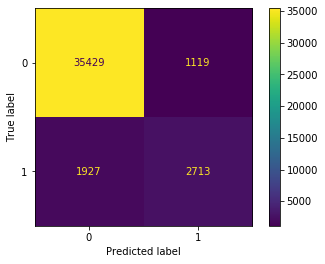

In [84]:
metrics.plot_confusion_matrix(gbm,X_all,Y)

In [61]:
# Gains Chart Analysis
# This will help understand the power of discrimination offered by the model's estimated probabilities

In [62]:
# Logistic Regression - Gains Chart

In [63]:
y_pred_prob = logreg.predict_proba(X_all)[:, 1]
df['pred_prob_logreg']=pd.DataFrame(y_pred_prob)
df['P_Rank_logreg']=pd.qcut(df['pred_prob_logreg'].rank(method='first').values,10,duplicates='drop').codes+1
rank_df_actuals=df.groupby('P_Rank_logreg')['target'].agg(['count','mean'])
rank_df_predicted=df.groupby('P_Rank_logreg')['pred_prob_logreg'].agg(['mean'])
rank_df_actuals=pd.DataFrame(rank_df_actuals)

rank_df_actuals.rename(columns={'mean':'Actual_event_rate'},inplace=True)
rank_df_predicted=pd.DataFrame(rank_df_predicted)
rank_df_predicted.rename(columns={'mean':'Predicted_event_rate'},inplace=True)
rank_df=pd.concat([rank_df_actuals,rank_df_predicted],axis=1,join="inner")

sorted_rank_df=rank_df.sort_values(by='P_Rank_logreg',ascending=False)
sorted_rank_df['N_events']=rank_df['count']*rank_df['Actual_event_rate']
sorted_rank_df['cum_events']=sorted_rank_df['N_events'].cumsum()
sorted_rank_df['event_cap']=sorted_rank_df['N_events']/max(sorted_rank_df['N_events'].cumsum())
sorted_rank_df['cum_event_cap']=sorted_rank_df['event_cap'].cumsum()

sorted_rank_df['N_non_events']=sorted_rank_df['count']-sorted_rank_df['N_events']
sorted_rank_df['cum_non_events']=sorted_rank_df['N_non_events'].cumsum()
sorted_rank_df['non_event_cap']=sorted_rank_df['N_non_events']/max(sorted_rank_df['N_non_events'].cumsum())
sorted_rank_df['cum_non_event_cap']=sorted_rank_df['non_event_cap'].cumsum()

sorted_rank_df['KS']=round((sorted_rank_df['cum_event_cap']-sorted_rank_df['cum_non_event_cap']),4)

sorted_rank_df['random_cap']=sorted_rank_df['count']/max(sorted_rank_df['count'].cumsum())
sorted_rank_df['cum_random_cap']=sorted_rank_df['random_cap'].cumsum()
sorted_reindexed=sorted_rank_df.reset_index()
sorted_reindexed['Decile']=sorted_reindexed.index+1
sorted_reindexed

,P_Rank_logreg,count,Actual_event_rate,Predicted_event_rate,N_events,cum_events,event_cap,cum_event_cap,N_non_events,cum_non_events,non_event_cap,cum_non_event_cap,KS,random_cap,cum_random_cap,Decile
0,10,4119,0.607672,0.638569,2503.0,2503.0,0.539440,0.539440,1616.0,1616.0,0.044216,0.044216,0.4952,0.100005,0.100005,1
1,9,4119,0.307356,0.245190,1266.0,3769.0,0.272845,0.812284,2853.0,4469.0,0.078062,0.122278,0.6900,0.100005,0.200010,2
2,8,4119,0.148337,0.097667,611.0,4380.0,0.131681,0.943966,3508.0,7977.0,0.095983,0.218261,0.7257,0.100005,0.300015,3
3,7,4118,0.038125,0.047604,157.0,4537.0,0.033836,0.977802,3961.0,11938.0,0.108378,0.326639,0.6512,0.099981,0.399995,4
4,6,4119,0.011168,0.028849,46.0,4583.0,0.009914,0.987716,4073.0,16011.0,0.111442,0.438081,0.5496,0.100005,0.500000,5
5,5,4119,0.004856,0.019891,20.0,4603.0,0.004310,0.992026,4099.0,20110.0,0.112154,0.550235,0.4418,0.100005,0.600005,6
6,4,4118,0.004371,0.014932,18.0,4621.0,0.003879,0.995905,4100.0,24210.0,0.112181,0.662417,0.3335,0.099981,0.699985,7
7,3,4119,0.003399,0.011356,14.0,4635.0,0.003017,0.998922,4105.0,28315.0,0.112318,0.774735,0.2242,0.100005,0.799990,8
8,2,4119,0.000971,0.007715,4.0,4639.0,0.000862,0.999784,4115.0,32430.0,0.112592,0.887326,0.1125,0.100005,0.899995,9
9,1,4119,0.000243,0.004015,1.0,4640.0,0.000216,1.000000,4118.0,36548.0,0.112674,1.000000,0.0000,0.100005,1.000000,10


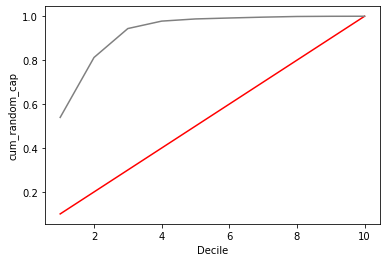

In [64]:
ax = sns.lineplot( x="Decile", y="cum_random_cap", data=sorted_reindexed,color='red')
ax = sns.lineplot( x="Decile", y="cum_event_cap", data=sorted_reindexed,color='grey')

In [ ]:
# Decision Tree - Gains Chart

In [65]:
y_pred_prob = dtree.predict_proba(X_all)[:, 1]
df['pred_prob_dtree']=pd.DataFrame(y_pred_prob)
df['P_Rank_tree']=pd.qcut(df['pred_prob_dtree'].rank(method='first').values,10,duplicates='drop').codes+1
rank_df_actuals=df.groupby('P_Rank_tree')['target'].agg(['count','mean'])
rank_df_predicted=df.groupby('P_Rank_tree')['pred_prob_dtree'].agg(['mean'])
rank_df_actuals=pd.DataFrame(rank_df_actuals)

rank_df_actuals.rename(columns={'mean':'Actual_event_rate'},inplace=True)
rank_df_predicted=pd.DataFrame(rank_df_predicted)
rank_df_predicted.rename(columns={'mean':'Predicted_event_rate'},inplace=True)
rank_df=pd.concat([rank_df_actuals,rank_df_predicted],axis=1,join="inner")

sorted_rank_df=rank_df.sort_values(by='P_Rank_tree',ascending=False)
sorted_rank_df['N_events']=rank_df['count']*rank_df['Actual_event_rate']
sorted_rank_df['cum_events']=sorted_rank_df['N_events'].cumsum()
sorted_rank_df['event_cap']=sorted_rank_df['N_events']/max(sorted_rank_df['N_events'].cumsum())
sorted_rank_df['cum_event_cap']=sorted_rank_df['event_cap'].cumsum()

sorted_rank_df['N_non_events']=sorted_rank_df['count']-sorted_rank_df['N_events']
sorted_rank_df['cum_non_events']=sorted_rank_df['N_non_events'].cumsum()
sorted_rank_df['non_event_cap']=sorted_rank_df['N_non_events']/max(sorted_rank_df['N_non_events'].cumsum())
sorted_rank_df['cum_non_event_cap']=sorted_rank_df['non_event_cap'].cumsum()

sorted_rank_df['KS']=round((sorted_rank_df['cum_event_cap']-sorted_rank_df['cum_non_event_cap']),4)

sorted_rank_df['random_cap']=sorted_rank_df['count']/max(sorted_rank_df['count'].cumsum())
sorted_rank_df['cum_random_cap']=sorted_rank_df['random_cap'].cumsum()
sorted_reindexed=sorted_rank_df.reset_index()
sorted_reindexed['Decile']=sorted_reindexed.index+1
sorted_reindexed

,P_Rank_tree,count,Actual_event_rate,Predicted_event_rate,N_events,cum_events,event_cap,cum_event_cap,N_non_events,cum_non_events,non_event_cap,cum_non_event_cap,KS,random_cap,cum_random_cap,Decile
0,10,4119,0.633406,0.632839,2609.0,2609.0,0.562284,0.562284,1510.0,1510.0,0.041316,0.041316,0.5210,0.100005,0.100005,1
1,9,4119,0.329206,0.328565,1356.0,3965.0,0.292241,0.854526,2763.0,4273.0,0.075599,0.116915,0.7376,0.100005,0.200010,2
2,8,4119,0.114834,0.100059,473.0,4438.0,0.101940,0.956466,3646.0,7919.0,0.099759,0.216674,0.7398,0.100005,0.300015,3
3,7,4118,0.028898,0.020242,119.0,4557.0,0.025647,0.982112,3999.0,11918.0,0.109418,0.326092,0.6560,0.099981,0.399995,4
4,6,4119,0.009468,0.004969,39.0,4596.0,0.008405,0.990517,4080.0,15998.0,0.111634,0.437726,0.5528,0.100005,0.500000,5
5,5,4119,0.006069,0.004969,25.0,4621.0,0.005388,0.995905,4094.0,20092.0,0.112017,0.549743,0.4462,0.100005,0.600005,6
6,4,4118,0.002428,0.004969,10.0,4631.0,0.002155,0.998060,4108.0,24200.0,0.112400,0.662143,0.3359,0.099981,0.699985,7
7,3,4119,0.001457,0.004969,6.0,4637.0,0.001293,0.999353,4113.0,28313.0,0.112537,0.774680,0.2247,0.100005,0.799990,8
8,2,4119,0.000486,0.004969,2.0,4639.0,0.000431,0.999784,4117.0,32430.0,0.112646,0.887326,0.1125,0.100005,0.899995,9
9,1,4119,0.000243,0.004969,1.0,4640.0,0.000216,1.000000,4118.0,36548.0,0.112674,1.000000,0.0000,0.100005,1.000000,10


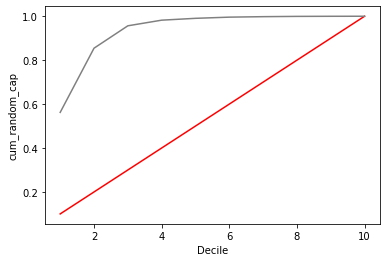

In [66]:
ax = sns.lineplot( x="Decile", y="cum_random_cap", data=sorted_reindexed,color='red')
ax = sns.lineplot( x="Decile", y="cum_event_cap", data=sorted_reindexed,color='grey')

In [67]:
# Random Forest Lorenz Curve

In [68]:
y_pred_prob = rf.predict_proba(X_all)[:, 1]
df['pred_prob_rf']=pd.DataFrame(y_pred_prob)
df['P_Rank_rf']=pd.qcut(df['pred_prob_rf'].rank(method='first').values,10,duplicates='drop').codes+1
rank_df_actuals=df.groupby('P_Rank_rf')['target'].agg(['count','mean'])
rank_df_predicted=df.groupby('P_Rank_rf')['pred_prob_rf'].agg(['mean'])
rank_df_actuals=pd.DataFrame(rank_df_actuals)

rank_df_actuals.rename(columns={'mean':'Actual_event_rate'},inplace=True)
rank_df_predicted=pd.DataFrame(rank_df_predicted)
rank_df_predicted.rename(columns={'mean':'Predicted_event_rate'},inplace=True)
rank_df=pd.concat([rank_df_actuals,rank_df_predicted],axis=1,join="inner")

sorted_rank_df=rank_df.sort_values(by='P_Rank_rf',ascending=False)
sorted_rank_df['N_events']=rank_df['count']*rank_df['Actual_event_rate']
sorted_rank_df['cum_events']=sorted_rank_df['N_events'].cumsum()
sorted_rank_df['event_cap']=sorted_rank_df['N_events']/max(sorted_rank_df['N_events'].cumsum())
sorted_rank_df['cum_event_cap']=sorted_rank_df['event_cap'].cumsum()

sorted_rank_df['N_non_events']=sorted_rank_df['count']-sorted_rank_df['N_events']
sorted_rank_df['cum_non_events']=sorted_rank_df['N_non_events'].cumsum()
sorted_rank_df['non_event_cap']=sorted_rank_df['N_non_events']/max(sorted_rank_df['N_non_events'].cumsum())
sorted_rank_df['cum_non_event_cap']=sorted_rank_df['non_event_cap'].cumsum()

sorted_rank_df['KS']=round((sorted_rank_df['cum_event_cap']-sorted_rank_df['cum_non_event_cap']),4)

sorted_rank_df['random_cap']=sorted_rank_df['count']/max(sorted_rank_df['count'].cumsum())
sorted_rank_df['cum_random_cap']=sorted_rank_df['random_cap'].cumsum()
sorted_reindexed=sorted_rank_df.reset_index()
sorted_reindexed['Decile']=sorted_reindexed.index+1
sorted_reindexed

,P_Rank_rf,count,Actual_event_rate,Predicted_event_rate,N_events,cum_events,event_cap,cum_event_cap,N_non_events,cum_non_events,non_event_cap,cum_non_event_cap,KS,random_cap,cum_random_cap,Decile
0,10,4119,0.587764,0.473614,2421.0,2421.0,0.521767,0.521767,1698.0,1698.0,0.046459,0.046459,0.4753,0.100005,0.100005,1
1,9,4119,0.332119,0.284369,1368.0,3789.0,0.294828,0.816595,2751.0,4449.0,0.075271,0.121730,0.6949,0.100005,0.200010,2
2,8,4119,0.152221,0.114247,627.0,4416.0,0.135129,0.951724,3492.0,7941.0,0.095546,0.217276,0.7344,0.100005,0.300015,3
3,7,4118,0.018213,0.059848,75.0,4491.0,0.016164,0.967888,4043.0,11984.0,0.110622,0.327898,0.6400,0.099981,0.399995,4
4,6,4119,0.028162,0.038589,116.0,4607.0,0.025000,0.992888,4003.0,15987.0,0.109527,0.437425,0.5555,0.100005,0.500000,5
5,5,4119,0.000971,0.033986,4.0,4611.0,0.000862,0.993750,4115.0,20102.0,0.112592,0.550016,0.4437,0.100005,0.600005,6
6,4,4118,0.000971,0.033197,4.0,4615.0,0.000862,0.994612,4114.0,24216.0,0.112564,0.662581,0.3320,0.099981,0.699985,7
7,3,4119,0.003399,0.029956,14.0,4629.0,0.003017,0.997629,4105.0,28321.0,0.112318,0.774899,0.2227,0.100005,0.799990,8
8,2,4119,0.001942,0.025047,8.0,4637.0,0.001724,0.999353,4111.0,32432.0,0.112482,0.887381,0.1120,0.100005,0.899995,9
9,1,4119,0.000728,0.021911,3.0,4640.0,0.000647,1.000000,4116.0,36548.0,0.112619,1.000000,-0.0000,0.100005,1.000000,10


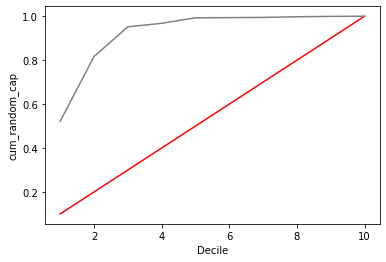

In [69]:
ax = sns.lineplot( x="Decile", y="cum_random_cap", data=sorted_reindexed,color='red')
ax = sns.lineplot( x="Decile", y="cum_event_cap", data=sorted_reindexed,color='grey')

In [ ]:
# Gradient Boost - Gains Chart

In [70]:
y_pred_prob = gbm.predict_proba(X_all)[:, 1]
df['pred_prob_gbm']=pd.DataFrame(y_pred_prob)
df['P_Rank_GBM']=pd.qcut(df['pred_prob_gbm'].rank(method='first').values,10,duplicates='drop').codes+1
rank_df_actuals=df.groupby('P_Rank_GBM')['target'].agg(['count','mean'])
rank_df_predicted=df.groupby('P_Rank_GBM')['pred_prob_gbm'].agg(['mean'])
rank_df_actuals=pd.DataFrame(rank_df_actuals)

rank_df_actuals.rename(columns={'mean':'Actual_event_rate'},inplace=True)
rank_df_predicted=pd.DataFrame(rank_df_predicted)
rank_df_predicted.rename(columns={'mean':'Predicted_event_rate'},inplace=True)
rank_df=pd.concat([rank_df_actuals,rank_df_predicted],axis=1,join="inner")

sorted_rank_df=rank_df.sort_values(by='P_Rank_GBM',ascending=False)
sorted_rank_df['N_events']=rank_df['count']*rank_df['Actual_event_rate']
sorted_rank_df['cum_events']=sorted_rank_df['N_events'].cumsum()
sorted_rank_df['event_cap']=sorted_rank_df['N_events']/max(sorted_rank_df['N_events'].cumsum())
sorted_rank_df['cum_event_cap']=sorted_rank_df['event_cap'].cumsum()

sorted_rank_df['N_non_events']=sorted_rank_df['count']-sorted_rank_df['N_events']
sorted_rank_df['cum_non_events']=sorted_rank_df['N_non_events'].cumsum()
sorted_rank_df['non_event_cap']=sorted_rank_df['N_non_events']/max(sorted_rank_df['N_non_events'].cumsum())
sorted_rank_df['cum_non_event_cap']=sorted_rank_df['non_event_cap'].cumsum()

sorted_rank_df['KS']=round((sorted_rank_df['cum_event_cap']-sorted_rank_df['cum_non_event_cap']),4)

sorted_rank_df['random_cap']=sorted_rank_df['count']/max(sorted_rank_df['count'].cumsum())
sorted_rank_df['cum_random_cap']=sorted_rank_df['random_cap'].cumsum()
sorted_reindexed=sorted_rank_df.reset_index()
sorted_reindexed['Decile']=sorted_reindexed.index+1
sorted_reindexed

,P_Rank_GBM,count,Actual_event_rate,Predicted_event_rate,N_events,cum_events,event_cap,cum_event_cap,N_non_events,cum_non_events,non_event_cap,cum_non_event_cap,KS,random_cap,cum_random_cap,Decile
0,10,4119,0.694101,0.668806,2859.0,2859.0,0.616164,0.616164,1260.0,1260.0,0.034475,0.034475,0.5817,0.100005,0.100005,1
1,9,4119,0.311726,0.311757,1284.0,4143.0,0.276724,0.892888,2835.0,4095.0,0.077569,0.112044,0.7808,0.100005,0.200010,2
2,8,4119,0.095897,0.088977,395.0,4538.0,0.085129,0.978017,3724.0,7819.0,0.101893,0.213938,0.7641,0.100005,0.300015,3
3,7,4118,0.019184,0.018823,79.0,4617.0,0.017026,0.995043,4039.0,11858.0,0.110512,0.324450,0.6706,0.099981,0.399995,4
4,6,4119,0.003399,0.008024,14.0,4631.0,0.003017,0.998060,4105.0,15963.0,0.112318,0.436768,0.5613,0.100005,0.500000,5
5,5,4119,0.001942,0.004894,8.0,4639.0,0.001724,0.999784,4111.0,20074.0,0.112482,0.549250,0.4505,0.100005,0.600005,6
6,4,4118,0.000000,0.003559,0.0,4639.0,0.000000,0.999784,4118.0,24192.0,0.112674,0.661924,0.3379,0.099981,0.699985,7
7,3,4119,0.000243,0.002919,1.0,4640.0,0.000216,1.000000,4118.0,28310.0,0.112674,0.774598,0.2254,0.100005,0.799990,8
8,2,4119,0.000000,0.002401,0.0,4640.0,0.000000,1.000000,4119.0,32429.0,0.112701,0.887299,0.1127,0.100005,0.899995,9
9,1,4119,0.000000,0.001569,0.0,4640.0,0.000000,1.000000,4119.0,36548.0,0.112701,1.000000,0.0000,0.100005,1.000000,10


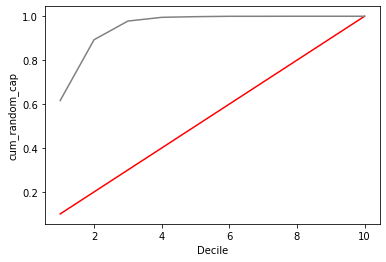

In [71]:
ax = sns.lineplot( x="Decile", y="cum_random_cap", data=sorted_reindexed,color='red')
ax = sns.lineplot( x="Decile", y="cum_event_cap", data=sorted_reindexed,color='grey')

# Project Conclusion :- 

In [72]:
# The GBM Model has performed the best and will be used for Customer targeting with retention offers in Telecom

In [73]:
# Categorise into just two categories i.e Top 2 and Bottom 8

df['Predicted_Response_Rank']=np.where(df['P_Rank_GBM']>8,"Top 2","Bottom 8")

In [74]:
# Check the mean response rate for each category

df.groupby('Predicted_Response_Rank')['target'].agg(['mean'])

,mean
Predicted_Response_Rank,
Bottom 8,0.015083
Top 2,0.502913


In [91]:
# Bucketing in 10 bins and giving them ranks

df['Duration_Rank']=pd.qcut(df['duration'].rank(method='first').values,10,duplicates='drop').codes+1

In [76]:
# Duration rankings

df.groupby('Duration_Rank')['duration'].agg(['min','mean','max'])

,min,mean,max
Duration_Rank,,,
1,0,34.379947,59
2,59,74.382617,89
3,89,102.283321,116
4,116,130.867654,146
5,146,162.387958,180
6,180,199.750182,222
7,222,248.925692,280
8,280,320.676863,368
9,368,445.551833,551


In [77]:
df['duration'].mean()

258.2850101971448

In [78]:
df['duration_segment']=np.where(df['Duration_Rank']>7,"High Duration","Low Duration")
df.duration_segment.value_counts()

Low Duration     28831
High Duration    12357
Name: duration_segment, dtype: int64

In [79]:
pd.crosstab(index=df['duration_segment'], columns=df['Predicted_Response_Rank'],values=df['Predicted_Response_Rank'],aggfunc='count')

Predicted_Response_Rank,Bottom 8,Top 2
duration_segment,,
High Duration,6554,5803
Low Duration,26396,2435


# Recommendations

In [80]:

# Phase 1 - Speak to customers who falls in top 2 predicted ranks(deciles) and also are in High Duration segment
# Phase 2 - Top 2 , Low Duration
# Phase 3 - Bottom 8 and High Duration (randomly select 25% of them only)